In [1]:
pip install kaggle

In [3]:
!pip install -q kaggle
from google.colab import userdata
import json
import os

# Create the .kaggle directory
os.makedirs('/root/.kaggle', exist_ok=True)

# Save your Kaggle credentials (get from https://www.kaggle.com/settings)
kaggle_creds = {
    "username": userdata.get('KAGGLE_USERNAME'),  # Set these in Colab Secrets
    "key": userdata.get('KAGGLE_KEY')             # (Notebook settings -> Secrets)
}

# Write credentials file
with open('/root/.kaggle/kaggle.json', 'w') as f:
    json.dump(kaggle_creds, f)

# Set permissions
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d alistairking/electricity-prices --unzip -p /content/data

Dataset URL: https://www.kaggle.com/datasets/alistairking/electricity-prices
License(s): U.S. Government Works
  0% 0.00/1.48M [00:00<?, ?B/s]
100% 1.48M/1.48M [00:00<00:00, 399MB/s]


In [5]:
import pandas as pd
df = pd.read_csv('/content/data/clean_data.csv', encoding='latin1')
print(df.head())

   year  month stateDescription   sectorName  customers  price   revenue  \
0  2001      1          Wyoming  all sectors        NaN   4.31  48.12840   
1  2001      1          Wyoming   commercial        NaN   5.13  12.67978   
2  2001      1          Wyoming   industrial        NaN   3.26  19.60858   
3  2001      1          Wyoming        other        NaN   4.75   0.76868   
4  2001      1          Wyoming  residential        NaN   6.01  15.07136   

        sales  
0  1116.17208  
1   247.08691  
2   602.30484  
3    16.17442  
4   250.60591  


In [6]:


df1 = df[(df['stateDescription'] == 'Wyoming') & (df['sectorName'] == 'all sectors')]
print(df1.head())

      year  month stateDescription   sectorName  customers  price   revenue  \
0     2001      1          Wyoming  all sectors        NaN   4.31  48.12840   
527   2001      2          Wyoming  all sectors        NaN   4.36  49.14779   
748   2001      3          Wyoming  all sectors        NaN   4.34  47.80066   
948   2001      4          Wyoming  all sectors        NaN   4.26  45.10077   
1507  2001      5          Wyoming  all sectors        NaN   4.40  44.83900   

           sales  
0     1116.17208  
527   1127.51736  
748   1101.55813  
948   1058.05787  
1507  1020.14633  


In [7]:
df1

,year,month,stateDescription,sectorName,customers,price,revenue,sales
0,2001,1,Wyoming,all sectors,NaN,4.31,48.12840,1116.17208
527,2001,2,Wyoming,all sectors,NaN,4.36,49.14779,1127.51736
748,2001,3,Wyoming,all sectors,NaN,4.34,47.80066,1101.55813
948,2001,4,Wyoming,all sectors,NaN,4.26,45.10077,1058.05787
1507,2001,5,Wyoming,all sectors,NaN,4.40,44.83900,1020.14633
...,...,...,...,...,...,...,...,...
84600,2023,9,Wyoming,all sectors,356223.0,8.64,115.50354,1336.60598
84840,2023,10,Wyoming,all sectors,356545.0,8.49,118.04273,1390.55527
85225,2023,11,Wyoming,all sectors,356721.0,8.34,120.44895,1445.07904
85418,2023,12,Wyoming,all sectors,356952.0,8.18,127.79073,1562.45686


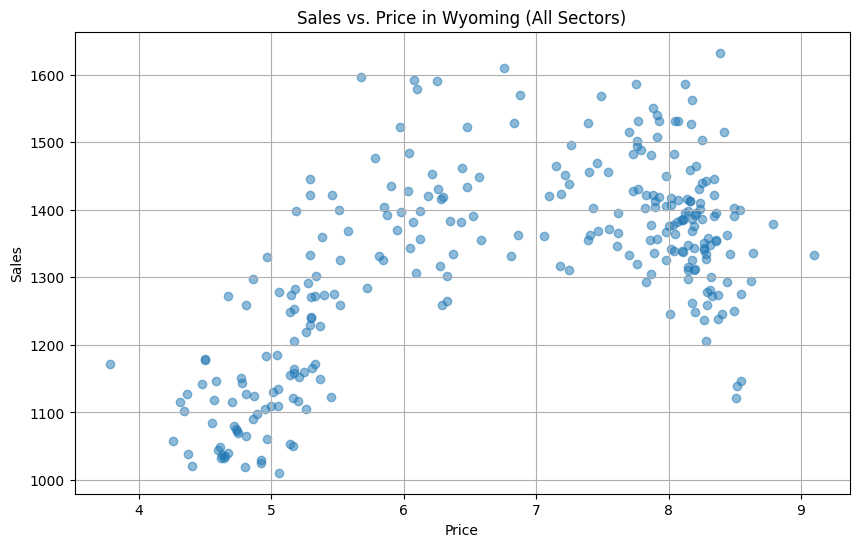

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df1['price'], df1['sales'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Sales')
plt.title('Sales vs. Price in Wyoming (All Sectors)')
plt.grid(True)
plt.show()

In [9]:

import pandas as pd
df1['time'] = pd.to_datetime(df1['year'].astype(str) + '-' + df1['month'].astype(str))
print(df1.head())

      year  month stateDescription   sectorName  customers  price   revenue  \
0     2001      1          Wyoming  all sectors        NaN   4.31  48.12840   
527   2001      2          Wyoming  all sectors        NaN   4.36  49.14779   
748   2001      3          Wyoming  all sectors        NaN   4.34  47.80066   
948   2001      4          Wyoming  all sectors        NaN   4.26  45.10077   
1507  2001      5          Wyoming  all sectors        NaN   4.40  44.83900   

           sales       time  
0     1116.17208 2001-01-01  
527   1127.51736 2001-02-01  
748   1101.55813 2001-03-01  
948   1058.05787 2001-04-01  
1507  1020.14633 2001-05-01  


/tmp/ipython-input-9-2679893915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['time'] = pd.to_datetime(df1['year'].astype(str) + '-' + df1['month'].astype(str))


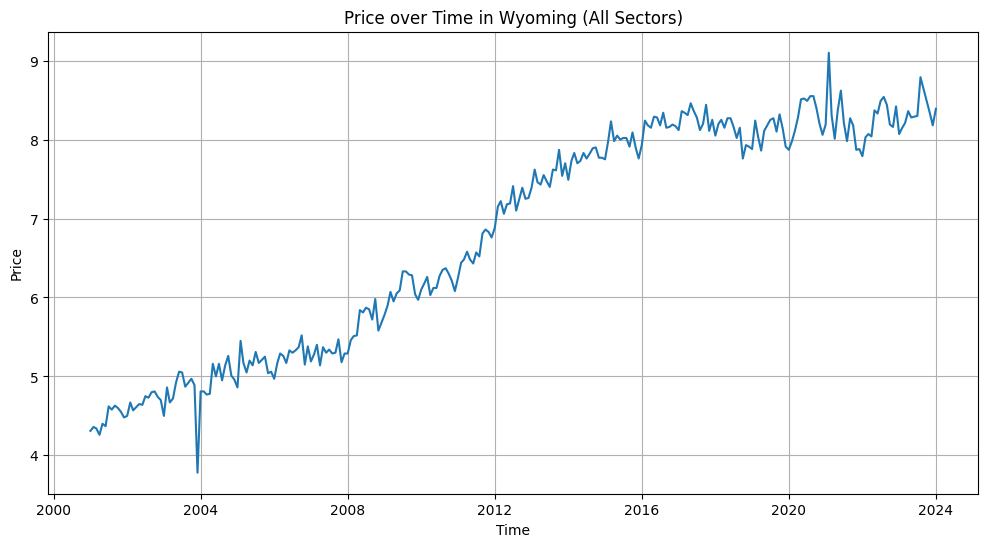

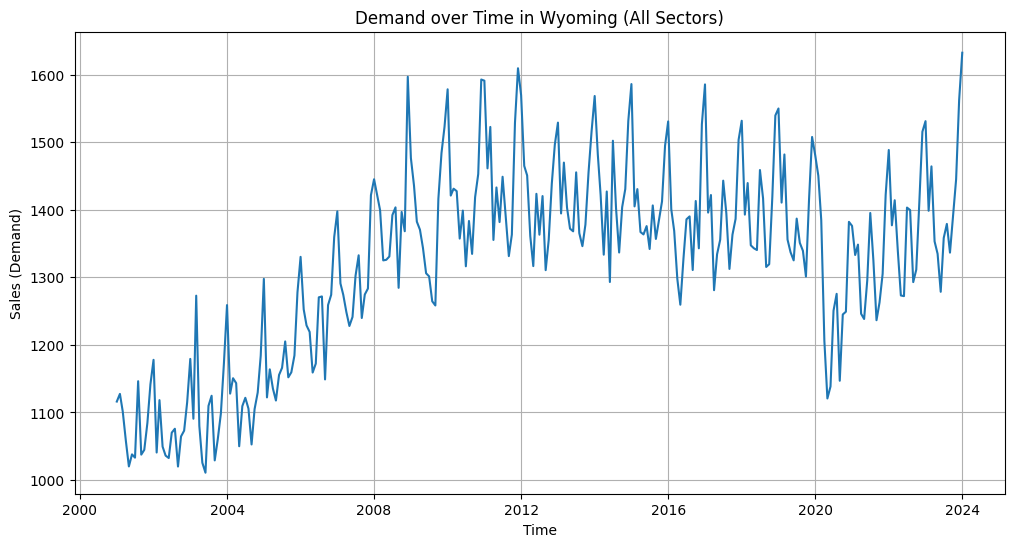

In [10]:
import matplotlib.pyplot as plt
# Price x Time graph
plt.figure(figsize=(12, 6))
plt.plot(df1['time'], df1['price'])
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Price over Time in Wyoming (All Sectors)')
plt.grid(True)
plt.show()

# Demand (Sales) x Time graph
plt.figure(figsize=(12, 6))
plt.plot(df1['time'], df1['sales'])
plt.xlabel('Time')
plt.ylabel('Sales (Demand)')
plt.title('Demand over Time in Wyoming (All Sectors)')
plt.grid(True)
plt.show()


First 5 rows:
   year  month stateDescription   sectorName  customers  price   revenue  \
0  2001      1          Wyoming  all sectors        NaN   4.31  48.12840   
1  2001      1          Wyoming   commercial        NaN   5.13  12.67978   
2  2001      1          Wyoming   industrial        NaN   3.26  19.60858   
3  2001      1          Wyoming        other        NaN   4.75   0.76868   
4  2001      1          Wyoming  residential        NaN   6.01  15.07136   

        sales  
0  1116.17208  
1   247.08691  
2   602.30484  
3    16.17442  
4   250.60591  

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85870 entries, 0 to 85869
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              85870 non-null  int64  
 1   month             85870 non-null  int64  
 2   stateDescription  85870 non-null  object 
 3   sectorName        85870 non-null  object 
 4   customers         59830 no

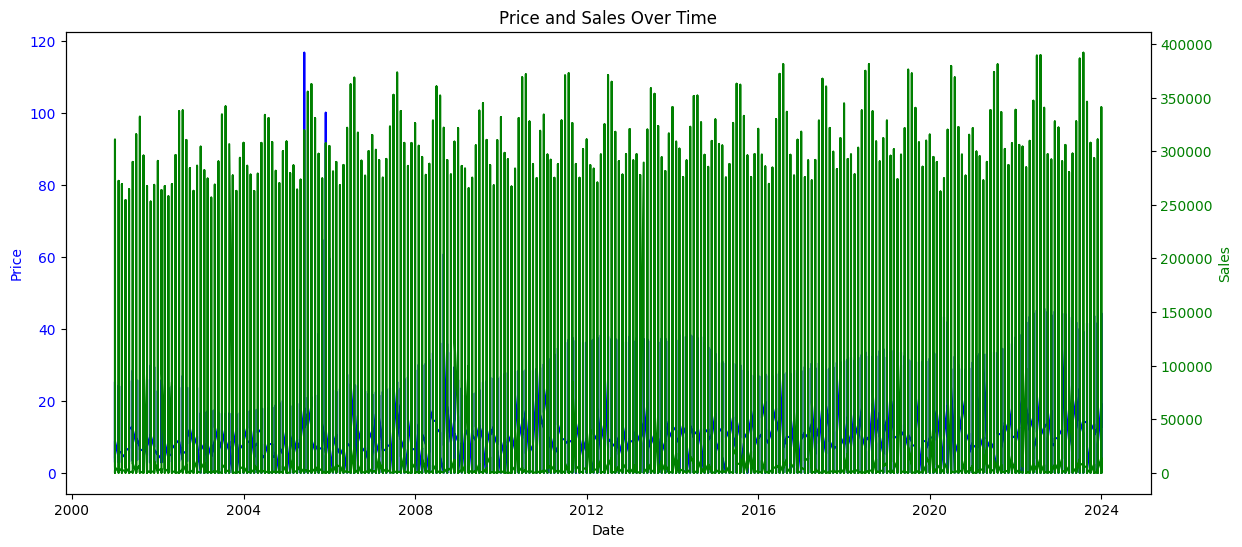

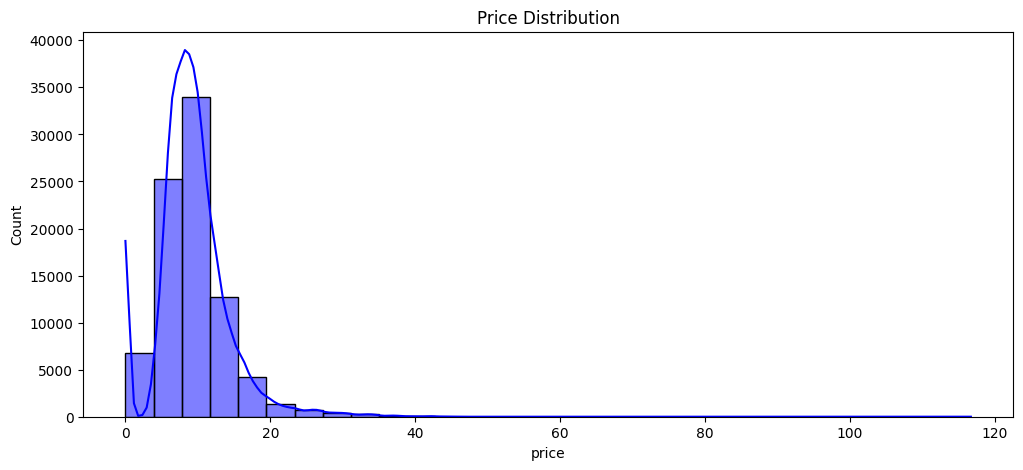

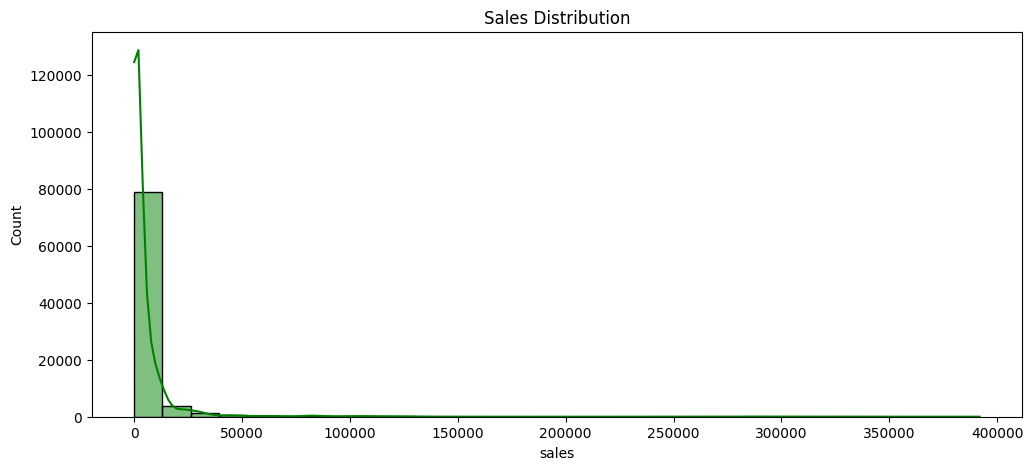

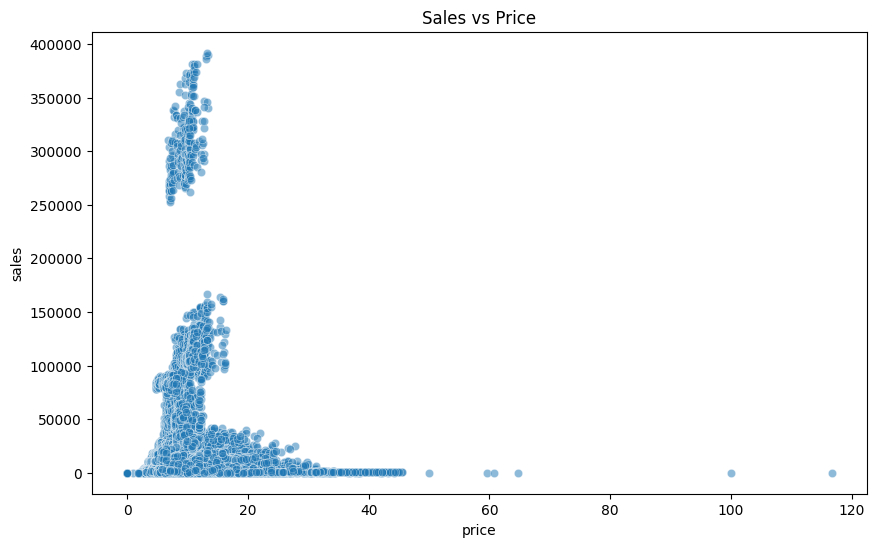

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data (you already did)
df = pd.read_csv('/content/data/clean_data.csv', encoding='latin1')

# 1. Peek at the first rows and info
print("First 5 rows:")
print(df.head())

print("\nData info:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())

# 2. Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# 3. Make sure you have columns like year, month, price, sales
print("\nColumns:", df.columns)

# 4. Create a datetime column if year/month exist
if 'year' in df.columns and 'month' in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
else:
    print("Year or month column missing; please specify date columns.")

# 5. Plot price and sales over time
if 'price' in df.columns and 'sales' in df.columns:
    fig, ax1 = plt.subplots(figsize=(14, 6))
    ax1.plot(df['date'], df['price'], color='blue', label='Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(df['date'], df['sales'], color='green', label='Sales')
    ax2.set_ylabel('Sales', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    plt.title('Price and Sales Over Time')
    plt.show()

    # Price distribution
    plt.figure(figsize=(12, 5))
    sns.histplot(df['price'], bins=30, kde=True, color='blue')
    plt.title('Price Distribution')
    plt.show()

    # Sales distribution
    plt.figure(figsize=(12, 5))
    sns.histplot(df['sales'], bins=30, kde=True, color='green')
    plt.title('Sales Distribution')
    plt.show()

    # Scatter plot for price vs sales
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='price', y='sales', data=df, alpha=0.5)
    plt.title('Sales vs Price')
    plt.show()

else:
    print("Price or sales column missing from data.")


# LSTM 2

In [12]:
import numpy as np

# Assuming df1 is your dataframe
df1['month_sin'] = np.sin(2 * np.pi * df1['month'] / 12)
df1['month_cos'] = np.cos(2 * np.pi * df1['month'] / 12)

df1['year_norm'] = (df1['year'] - df1['year'].min()) / (df1['year'].max() - df1['year'].min())


In [13]:
df1

,year,month,stateDescription,sectorName,customers,price,revenue,sales,time,month_sin,month_cos,year_norm
0,2001,1,Wyoming,all sectors,NaN,4.31,48.12840,1116.17208,2001-01-01,5.000000e-01,8.660254e-01,0.000000
527,2001,2,Wyoming,all sectors,NaN,4.36,49.14779,1127.51736,2001-02-01,8.660254e-01,5.000000e-01,0.000000
748,2001,3,Wyoming,all sectors,NaN,4.34,47.80066,1101.55813,2001-03-01,1.000000e+00,6.123234e-17,0.000000
948,2001,4,Wyoming,all sectors,NaN,4.26,45.10077,1058.05787,2001-04-01,8.660254e-01,-5.000000e-01,0.000000
1507,2001,5,Wyoming,all sectors,NaN,4.40,44.83900,1020.14633,2001-05-01,5.000000e-01,-8.660254e-01,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
84600,2023,9,Wyoming,all sectors,356223.0,8.64,115.50354,1336.60598,2023-09-01,-1.000000e+00,-1.836970e-16,0.956522
84840,2023,10,Wyoming,all sectors,356545.0,8.49,118.04273,1390.55527,2023-10-01,-8.660254e-01,5.000000e-01,0.956522
85225,2023,11,Wyoming,all sectors,356721.0,8.34,120.44895,1445.07904,2023-11-01,-5.000000e-01,8.660254e-01,0.956522
85418,2023,12,Wyoming,all sectors,356952.0,8.18,127.79073,1562.45686,2023-12-01,-2.449294e-16,1.000000e+00,0.956522


In [14]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# --- 1. Prepare dataframe features ---

# Add cyclical month features (keep as is, no scaling)
df1['month_sin'] = np.sin(2 * np.pi * df1['month'] / 12)
df1['month_cos'] = np.cos(2 * np.pi * df1['month'] / 12)

# Normalize year (continuous)
df1['year_norm'] = (df1['year'] - df1['year'].min()) / (df1['year'].max() - df1['year'].min())

# Apply log transform before scaling
df1['log_price'] = np.log1p(df1['price'])
df1['log_sales'] = np.log1p(df1['sales'])
# --- 2. Custom Dataset ---

class DemandDataset(Dataset):
    def __init__(self, df, seq_length=24):
        self.seq_length = seq_length

        self.scaler_price = MinMaxScaler()
        self.scaler_demand = MinMaxScaler()

        # Fit scalers on log-transformed data
        log_price = df[['log_price']].values.astype(np.float32)
        log_sales = df[['log_sales']].values.astype(np.float32)

        self.scaler_price.fit(log_price)
        self.scaler_demand.fit(log_sales)

        price_scaled = self.scaler_price.transform(log_price)
        demand_scaled = self.scaler_demand.transform(log_sales)

        # Other features
        month_sin = df['month_sin'].values.reshape(-1, 1).astype(np.float32)
        month_cos = df['month_cos'].values.reshape(-1, 1).astype(np.float32)
        year_norm = df['year_norm'].values.reshape(-1, 1).astype(np.float32)

        # Combine features: price_scaled, sales_scaled, year_norm, month_sin, month_cos
        self.features = np.hstack([price_scaled, demand_scaled, year_norm, month_sin, month_cos])

    def __len__(self):
        return len(self.features) - self.seq_length

    def __getitem__(self, idx):
        x = self.features[idx:idx + self.seq_length]
        y = self.features[idx + self.seq_length, 1]  # sales (scaled)
        return torch.FloatTensor(x), torch.FloatTensor([y])

# --- 3. Model (input_size = 5 features) ---

class DemandPredictor(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=5, hidden_size=64, num_layers=2,
                            batch_first=True, dropout=0.2)
        self.layer_norm = nn.LayerNorm(64)
        self.attention = nn.Sequential(
            nn.Linear(64, 32),
            nn.Tanh(),
            nn.Linear(32, 1),
            nn.Softmax(dim=1)
        )
        self.fc = nn.Linear(64, 1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)               # lstm_out shape: (batch, seq_len, hidden_size)
        lstm_out = self.layer_norm(lstm_out)    # Apply LayerNorm to stabilize training
        attn_weights = self.attention(lstm_out) # Compute attention weights over sequence length
        context = torch.sum(attn_weights * lstm_out, dim=1)  # Weighted sum to get context vector
        return self.fc(context)                   # Final output (predicted demand)




In [15]:
# --- 4. Training function ---

def train_model():
    seq_length = 24
    dataset = DemandDataset(df1, seq_length)

    train_size = int(0.8 * len(dataset))
    indices = list(range(len(dataset)))

    train_indices = indices[:train_size]  # first 80% in time order
    test_indices = indices[train_size:]   # last 20%

    from torch.utils.data import Subset

    train_data = Subset(dataset, train_indices)
    test_data = Subset(dataset, test_indices)

    train_loader = DataLoader(train_data, batch_size=16, shuffle=True)  # shuffle batches within train
    test_loader = DataLoader(test_data, batch_size=16, shuffle=False)   # no shuffle on test
#    train_size = int(0.8 * len(dataset))
#    train_data, test_data = torch.utils.data.random_split(dataset, [train_size, len(dataset) - train_size])

#    train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
#    test_loader = DataLoader(test_data, batch_size=32)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = DemandPredictor().to(device)

    optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3)
    criterion = nn.MSELoss()

    best_val_loss = float('inf')
    patience = 5
    counter = 0


    for epoch in range(100):
        model.train()
        train_loss = 0
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            outputs = model(x)
            loss = criterion(outputs, y)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            train_loss += loss.item()

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for x, y in test_loader:
                x, y = x.to(device), y.to(device)
                outputs = model(x)
                val_loss += criterion(outputs, y).item()

        avg_train = train_loss / len(train_loader)
        avg_val = val_loss / len(test_loader)
        print(f'Epoch {epoch+1}: Train Loss {avg_train:.6f}, Val Loss {avg_val:.6f}')
        scheduler.step(val_loss)

        if avg_val < best_val_loss:
            best_val_loss = avg_val
            counter = 0
            best_model_state = model.state_dict()  # save best model
        else:
            counter += 1
            if counter >= patience:
                print(f"Stopping early at epoch {epoch+1}. No improvement for {patience} epochs.")
                model.load_state_dict(best_model_state)  # restore best model
                break



    return model, test_loader, device

# --- 5. Plotting function ---

def plot_results(model, test_loader, device):
    model.eval()
    preds, truths = [], []
    with torch.no_grad():
        for x, y in test_loader:
            x = x.to(device)
            pred = model(x)
            preds.extend(pred.cpu().numpy())
            truths.extend(y.numpy())

    plt.figure(figsize=(12, 6))
    plt.plot(truths, label='True Demand')
    plt.plot(preds, label='Predicted Demand', alpha=0.7)
    plt.legend()
    plt.show()



Epoch 1: Train Loss 0.052901, Val Loss 0.028282
Epoch 2: Train Loss 0.030165, Val Loss 0.120665
Epoch 3: Train Loss 0.017111, Val Loss 0.024353
Epoch 4: Train Loss 0.011682, Val Loss 0.026022
Epoch 5: Train Loss 0.010485, Val Loss 0.027470
Epoch 6: Train Loss 0.012001, Val Loss 0.023230
Epoch 7: Train Loss 0.011742, Val Loss 0.023324
Epoch 8: Train Loss 0.009239, Val Loss 0.025259
Epoch 9: Train Loss 0.009788, Val Loss 0.026115
Epoch 10: Train Loss 0.010463, Val Loss 0.021495
Epoch 11: Train Loss 0.013304, Val Loss 0.026103
Epoch 12: Train Loss 0.011883, Val Loss 0.027273
Epoch 13: Train Loss 0.008635, Val Loss 0.022687
Epoch 14: Train Loss 0.008818, Val Loss 0.020751
Epoch 15: Train Loss 0.007394, Val Loss 0.020005
Epoch 16: Train Loss 0.007149, Val Loss 0.022356
Epoch 17: Train Loss 0.008019, Val Loss 0.019747
Epoch 18: Train Loss 0.010127, Val Loss 0.021442
Epoch 19: Train Loss 0.009274, Val Loss 0.023424
Epoch 20: Train Loss 0.007030, Val Loss 0.021910
Epoch 21: Train Loss 0.007308

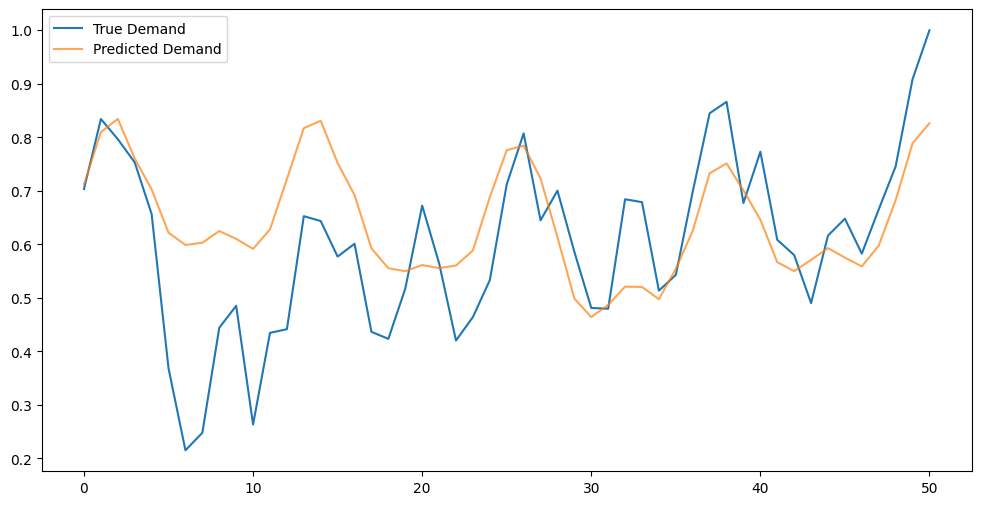

In [16]:
model, test_loader, device = train_model()
plot_results(model, test_loader, device)
